In [1]:
# --- a. Import the necessary packages ---

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam # Switched to Adam for better CNN performance
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
def load_and_preprocess_data(filepath, num_classes=10, image_size=(32, 32, 3)):

    # 1. Load the dataset
    print(f"Loading data from: {filepath}...")
    data = pd.read_csv(filepath)

    # 2. Separate features (pixels) and target (label)
    X = data.iloc[:, :-1].values.astype('float32') # Pixel data starts from the second column
    y = data['label'].values

    # 3. Reshape the data for CNN: (samples, 784) -> (samples, 28, 28, 1)
    # The '1' denotes a single colour channel (grayscale)
    X = X.reshape(X.shape[0], *image_size)

    # 4. Normalise the pixel data: Scale to the range [0, 1]
    # MNIST pixels are 0 to 255 (unsigned 8-bit integers)
    X /= 255.0

    # . One-hot encode the target labels
    y = to_categorical(y, num_classes=num_classes)

    return X, y

In [3]:
# Load the training and testing data

X_train, y_train = load_and_preprocess_data(r"C:\Users\hp\OneDrive\Desktop\LP4\CIFR\CIFR_Ass2_and_Ass3\train_data.csv")
X_test, y_test = load_and_preprocess_data(r"C:\Users\hp\OneDrive\Desktop\LP4\CIFR\CIFR_Ass2_and_Ass3\test_data.csv")

Loading data from: C:\Users\hp\OneDrive\Desktop\LP4\CIFR\CIFR_Ass2_and_Ass3\train_data.csv...
Loading data from: C:\Users\hp\OneDrive\Desktop\LP4\CIFR\CIFR_Ass2_and_Ass3\test_data.csv...


In [4]:
# --- b. Defining the model's architecture ---

model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), name='Conv_1'),
    MaxPooling2D((2, 2), name='Pool_1'),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu', name='Conv_2'),
    MaxPooling2D((2, 2), name='Pool_2'),

    # Classification Head (Feedforward/Dense Layers)
    Flatten(name='Flatten_Layer'), # Flatten feature maps to a vector
    Dense(100, activation='relu', name='Dense_1'),
    Dense(10, activation='softmax', name='Output_Layer') # Output 10 classes
])

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
# We use the Adam optimizer and the categorical crossentropy loss
model.compile(
    optimizer=Adam(learning_rate=0.001), # Adam is generally superior for CNNs
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool_1 (MaxPooling2D)           │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool_2 (MaxPooling2D)           │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_Layer (Flatten)         │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 100)            │       230,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,902 (980.09 KB)

 Trainable params: 250,902 (980.09 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# --- c. Training the model ---

print("Starting model training for 10 epochs...")
H = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=128,
    verbose=1
)
print("Model training complete.")

Starting model training for 10 epochs...
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.4410 - loss: 1.5578 - val_accuracy: 0.5394 - val_loss: 1.2993
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.5719 - loss: 1.2093 - val_accuracy: 0.6085 - val_loss: 1.1226
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.6256 - loss: 1.0701 - val_accuracy: 0.6379 - val_loss: 1.0397
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.6592 - loss: 0.9805 - val_accuracy: 0.6407 - val_loss: 1.0275
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6812 - loss: 0.9201 - val_accuracy: 0.6742 - val_loss: 0.9451
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.7031 - loss: 0.8618 - val_accuracy: 0.6823 - val_loss: 0.9187
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.7205 - loss: 0.8070 - val_accuracy: 0.6845 - val_loss: 0.9073
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/

In [7]:
# --- d. Estimating the model's performance ---

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 0.9011
Test Accuracy: 69.97%


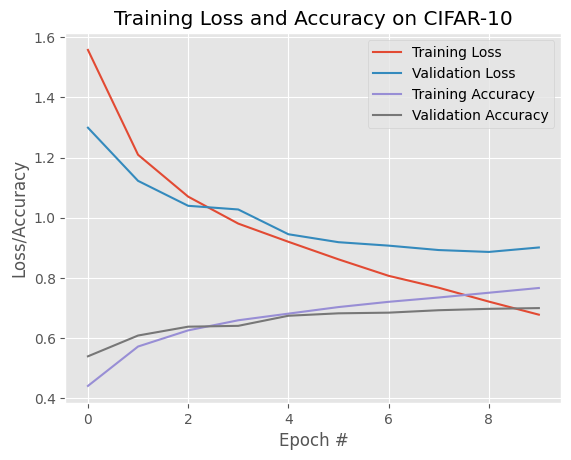

In [8]:
# Plotting the training progress
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 10), H.history["loss"], label="Training Loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="Validation Loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="Training Accuracy")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="Validation Accuracy")

plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()